In [1]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 200
IMG_WIDTH = 200

Output streaming troncato alle ultime 5000 righe.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and_

In [3]:
import os
import shutil

# Percorso della directory di test
test_dir = 'cats_and_dogs/test'

# Crea la sottodirectory 'cats_and_dogs' se non esiste
output_dir = os.path.join(test_dir, 'dest')
os.makedirs(output_dir, exist_ok=True)

# Sposta tutte le immagini di test nella sottodirectory 'cats_and_dogs'
for filename in os.listdir(test_dir):
    # Salta la directory 'dest'
    if filename == 'dest':
        continue
    source_path = os.path.join(test_dir, filename)
    destination_path = os.path.join(output_dir, filename)
    shutil.move(source_path, destination_path)

# Verifica che le immagini siano state spostate correttamente
print(f"Numero totale di immagini nel set di test: {len(os.listdir(output_dir))}")


Numero totale di immagini nel set di test: 51


In [4]:
# 3
# Creo generatori di immagini per training, validazione e test
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

# Imposta i generatori di immagini utilizzando il metodo flow_from_directory
train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=32,
    class_mode='binary'
)
val_data_gen = validation_image_generator.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=32,
    class_mode='binary'
)

test_data_gen = test_image_generator.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=1,
    class_mode=None,
    shuffle=False
)



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


In [5]:
import os

test_image_count = len(os.listdir(test_dir))
print(f"Numero totale di immagini nel set di test: {test_image_count}")

Numero totale di immagini nel set di test: 1


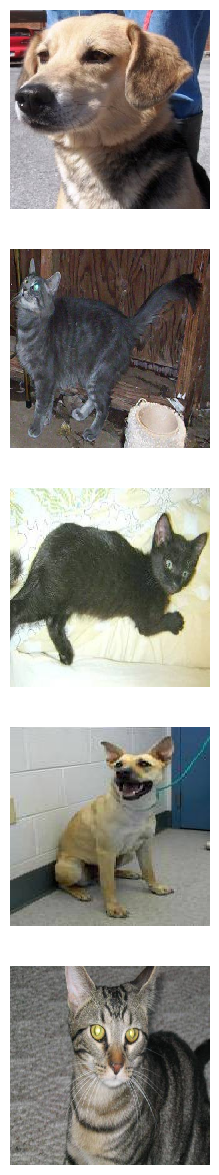

In [6]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [7]:
# 5
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Crea un generatore di immagini con trasformazioni casuali
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Imposta il generatore di immagini utilizzando il metodo flow_from_directory
train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=32,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.


Found 2000 images belonging to 2 classes.


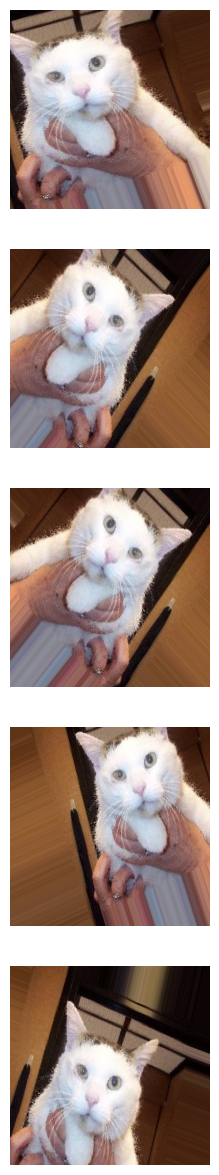

In [8]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import SGD

num_classes = 2

# Crea un modello sequenziale
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
 # compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Stampa il summary del modello
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 100, 100, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 50, 50, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 25, 25, 128)       0

In [14]:
# Imposta il numero di epoche e i passi per epoca
from tensorflow.keras.callbacks import ModelCheckpoint

# Imposta il percorso in cui salvare il modello
checkpoint_path = "model_checkpoint.h5"

# Crea il callback ModelCheckpoint
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=False,  # Salva l'intero modello
    save_best_only=True,  # Salva solo se la performance sul set di validazione è migliorata
    monitor='val_accuracy',  # Monitora l'accuratezza sul set di validazione
    mode='max',  # Modalità "massimizza" per l'accuratezza
    verbose=1  # Stampa messaggi
)

epochs = 10
steps_per_epoch = train_data_gen.samples // train_data_gen.batch_size
validation_steps = val_data_gen.samples // val_data_gen.batch_size

# Addestra il modello con il callback ModelCheckpoint
history = model.fit(
    train_data_gen,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=validation_steps,
    verbose=1
)





Epoch 1/10
15/15 [==============================] - 24s 2s/step - loss: 0.6424 - accuracy: 0.6165 - val_loss: 0.6189 - val_accuracy: 0.6442
Epoch 2/10
15/15 [==============================] - 23s 2s/step - loss: 0.6324 - accuracy: 0.6373 - val_loss: 0.6098 - val_accuracy: 0.6613
Epoch 3/10
15/15 [==============================] - 24s 2s/step - loss: 0.6208 - accuracy: 0.6405 - val_loss: 0.6057 - val_accuracy: 0.6734
Epoch 4/10
15/15 [==============================] - 25s 2s/step - loss: 0.6216 - accuracy: 0.6400 - val_loss: 0.6032 - val_accuracy: 0.6724
Epoch 5/10
15/15 [==============================] - 27s 2s/step - loss: 0.6245 - accuracy: 0.6426 - val_loss: 0.6004 - val_accuracy: 0.6815
Epoch 6/10
15/15 [==============================] - 23s 2s/step - loss: 0.6212 - accuracy: 0.6538 - val_loss: 0.6037 - val_accuracy: 0.6875
Epoch 7/10
15/15 [==============================] - 23s 2s/step - loss: 0.6277 - accuracy: 0.6517 - val_loss: 0.6031 - val_accuracy: 0.6694
Epoch 8/10
15/15 [==

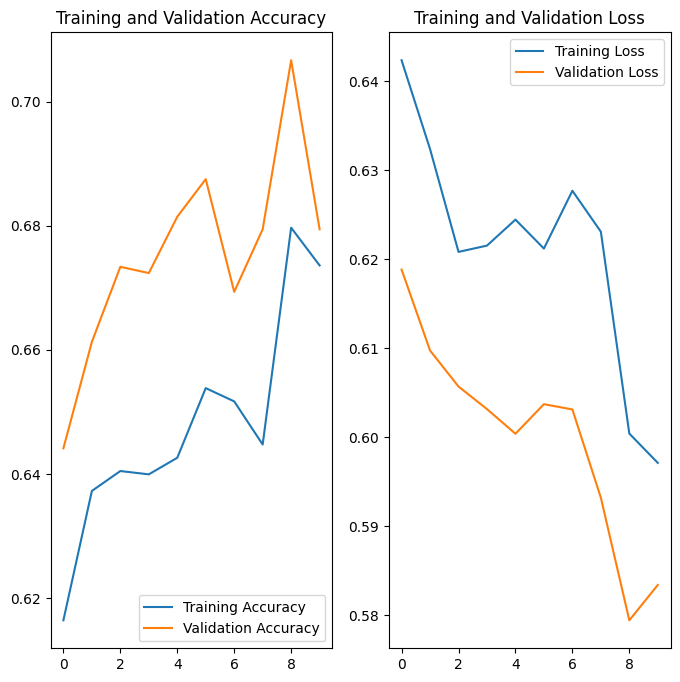

In [15]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

2/2 [==============================] - 0s 16ms/step


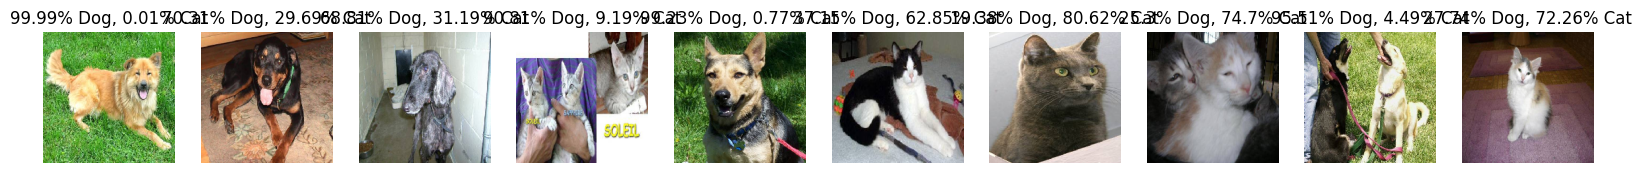

In [16]:

import random

test_images = []

# Ottieni tutte le immagini di test
for _ in range(test_data_gen.samples):
    img = next(test_data_gen)
    test_images.append(img)

# Converti la lista di immagini in un array numpy
test_images = np.vstack(test_images)

# Prevedi le probabilità con il modello
probabilities = model.predict(test_images)

# Genera 10 indici casuali
random_indices = random.sample(range(len(test_images)), 10)

# Estrai le immagini e le probabilità corrispondenti agli indici casuali
selected_images = test_images[random_indices]
selected_probabilities = probabilities[random_indices]

# Funzione per la visualizzazione delle immagini con le probabilità
def plotImages(images_arr, probabilities):
    fig, axes = plt.subplots(1, len(images_arr), figsize=(20, 20))
    for img, probability, ax in zip(images_arr, probabilities, axes):
        ax.imshow(img)
        ax.set_title(f'{round(probability[0]*100, 2)}% Dog, {round((1-probability[0])*100, 2)}% Cat')
        ax.axis('off')

    plt.show()

# Chiama la funzione di visualizzazione delle immagini casuali
plotImages(selected_images, selected_probabilities)




In [17]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
    # Estrai il valore singolo dall'array di probabilità
    rounded_probability = round(probability[0])

    if rounded_probability == answer:
        correct += 1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
    print("You passed the challenge!")
else:
    print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")


Your model correctly identified 70.0% of the images of cats and dogs.
You passed the challenge!
